In [1]:
from search import SearchEngine
import torch

THRESHOLD = 1
SAVE_DIRECTORY = './binary_embeddings'

In [2]:
from torchvision import transforms
from folder import ImageFolder
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225]),
])

data = ImageFolder('./Flickr', transform=transform)
print("{} images encompassing {} classes".format(len(data), len(data.classes)))

269648 images encompassing 704 classes


In [3]:
cuda = torch.cuda.is_available()

In [4]:
batch_size = 128
kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}
data_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, **kwargs)

In [5]:
search_engine = SearchEngine(data=data_loader, cuda = cuda, threshold = THRESHOLD, save_directory = SAVE_DIRECTORY)

Transform was not specified. Using default value
Embedding Net was not specified. Using default value


In [6]:
# search_engine.fit(data_loader, verbose = True, step_size=100, save_embeddings=True)
search_engine.fit(data_loader, verbose = True, step_size=500, load_embeddings=True)

Batch 0 of 2107
Batch 500 of 2107
Batch 1000 of 2107
Batch 1500 of 2107
Batch 2000 of 2107
Finished fitting data in 1.2487 seconds.


In [7]:
import numpy as np
import matplotlib.pyplot as plt

data_untransformed = ImageFolder('./Flickr')

def display(index=None, n=5):
    if index is None:
        index = np.random.randint(0,len(data))
    
    distances, idx = search_engine.search(data[index][0][None,:,:,:], verbose = True, threshold=1, n=n)
    distances = distances.astype(int)
    results = []
    for i in idx.astype(int)[0]:
        results.append(data_untransformed[i])

    plt.figure()
    plt.title("Search Query: Index {}".format(index))
    plt.imshow(data_untransformed[index][0])

    for i in range(len(results)):
        plt.figure()
        plt.title("Search Result {}: Index {}".format(i+1, int(idx[0][i])))
        plt.ylabel("Class: {}".format(data_untransformed.classes[results[i][1]]))
        plt.xlabel("Distance: {}".format(distances[0][i]))
        plt.imshow(results[i][0])

Median distance: 138.0
Mean distance: 113.19999694824219
Time elapsed: 0.07025


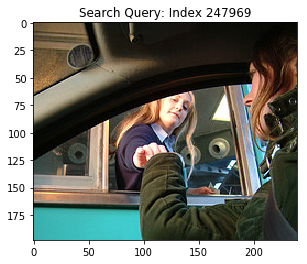

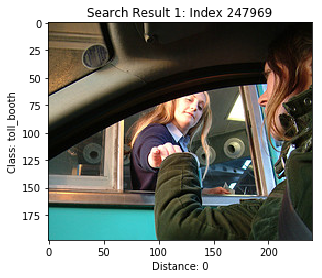

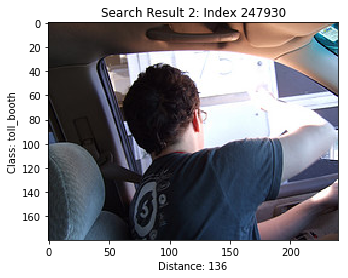

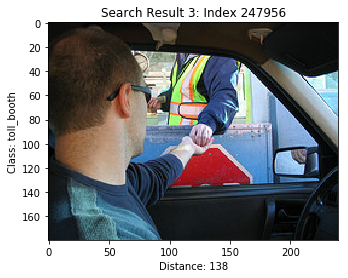

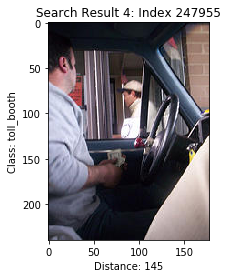

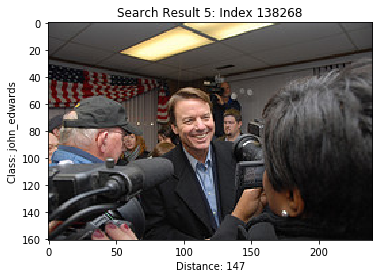

In [8]:
display(n=5)